### Practical 17

### Using IRIS Dataset to implement the Random Forest Classifier and plot 2 tree.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
import sklearn.datasets as data
iris_data=data.load_iris()
dataset=pd.DataFrame(iris_data.data)

print('Feature Name: ',iris_data.feature_names)
print('Target name: ',iris_data.target_names)
print('Dataset Shape :',dataset.shape)

Feature Name:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target name:  ['setosa' 'versicolor' 'virginica']
Dataset Shape : (150, 4)


In [4]:
dataset.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Now we will create a new column named 'species' in the dataset. 
#The values of species column is same as iris_data.target
dataset['species']=iris_data.target

In [8]:
# Adding column name to the respective columns
dataset.columns=['sepallength','sepalwidth','petallength','petalwidth','species']
print(dataset.head())

   sepallength  sepalwidth  petallength  petalwidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


In [10]:
# Retrieving features or independent variables.
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [11]:
# Random Forest.
from sklearn.ensemble import RandomForestClassifier
#criterion{'gini','entropy'}, default='gini'
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [12]:
# Predicting using predict()
y_pred=clf.predict(x_test)
print('y_predict is:',"\n",y_pred)

y_predict is: 
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


In [15]:
# Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ','\n',confusion_matrix(y_test,y_pred))

# Accuracy Score
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,y_pred)*100,'%')

# Classification Report
from sklearn.metrics import classification_report
print('Report: \n',classification_report(y_test,y_pred))

Confusion Matrix:  
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Accuracy Score:  95.55555555555556 %
Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [16]:
clf.predict([[3,2,3,2]])

array([2])

In [17]:
# using the feature importance variable
feature_imp=pd.Series(clf.feature_importances_, index=iris_data.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.458989
petal length (cm)    0.432674
sepal length (cm)    0.081158
sepal width (cm)     0.027180
dtype: float64

In [20]:
# Plotting 1st decision tree
# first decision tree is 0th tree and total tree is from 0 to 99
clf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1907713133)

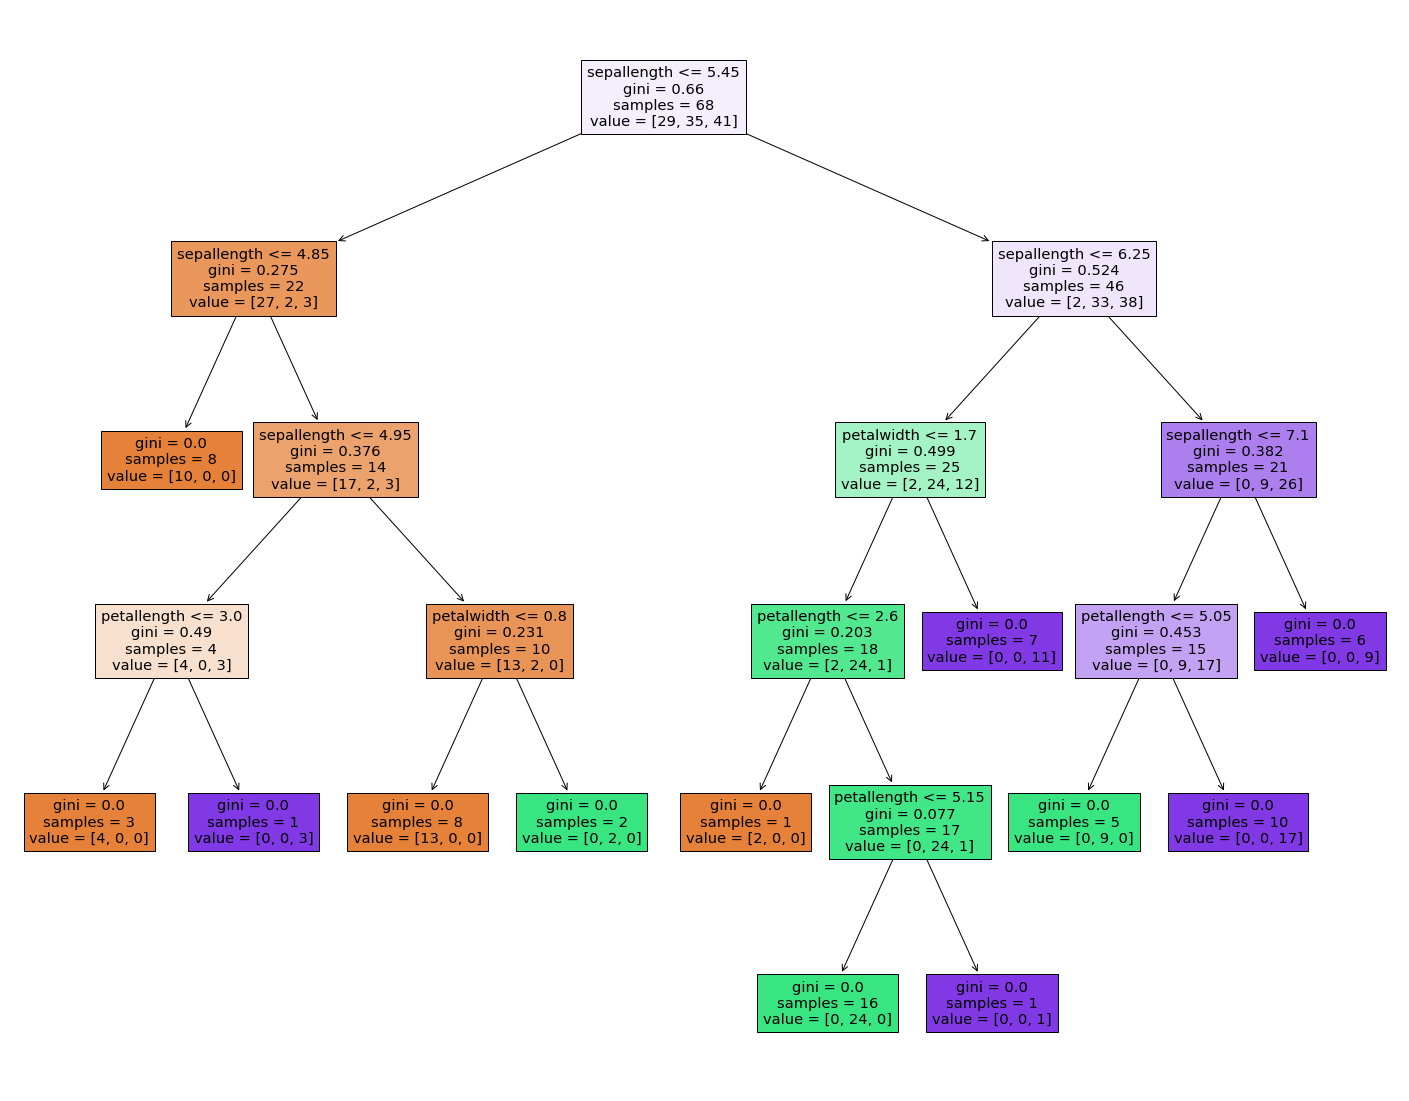

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,20))
a=tree.plot_tree(clf.estimators_[0],feature_names=x.columns,filled=True)

In [22]:
#Plotting 5th Decision Tree
clf.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=507042806)

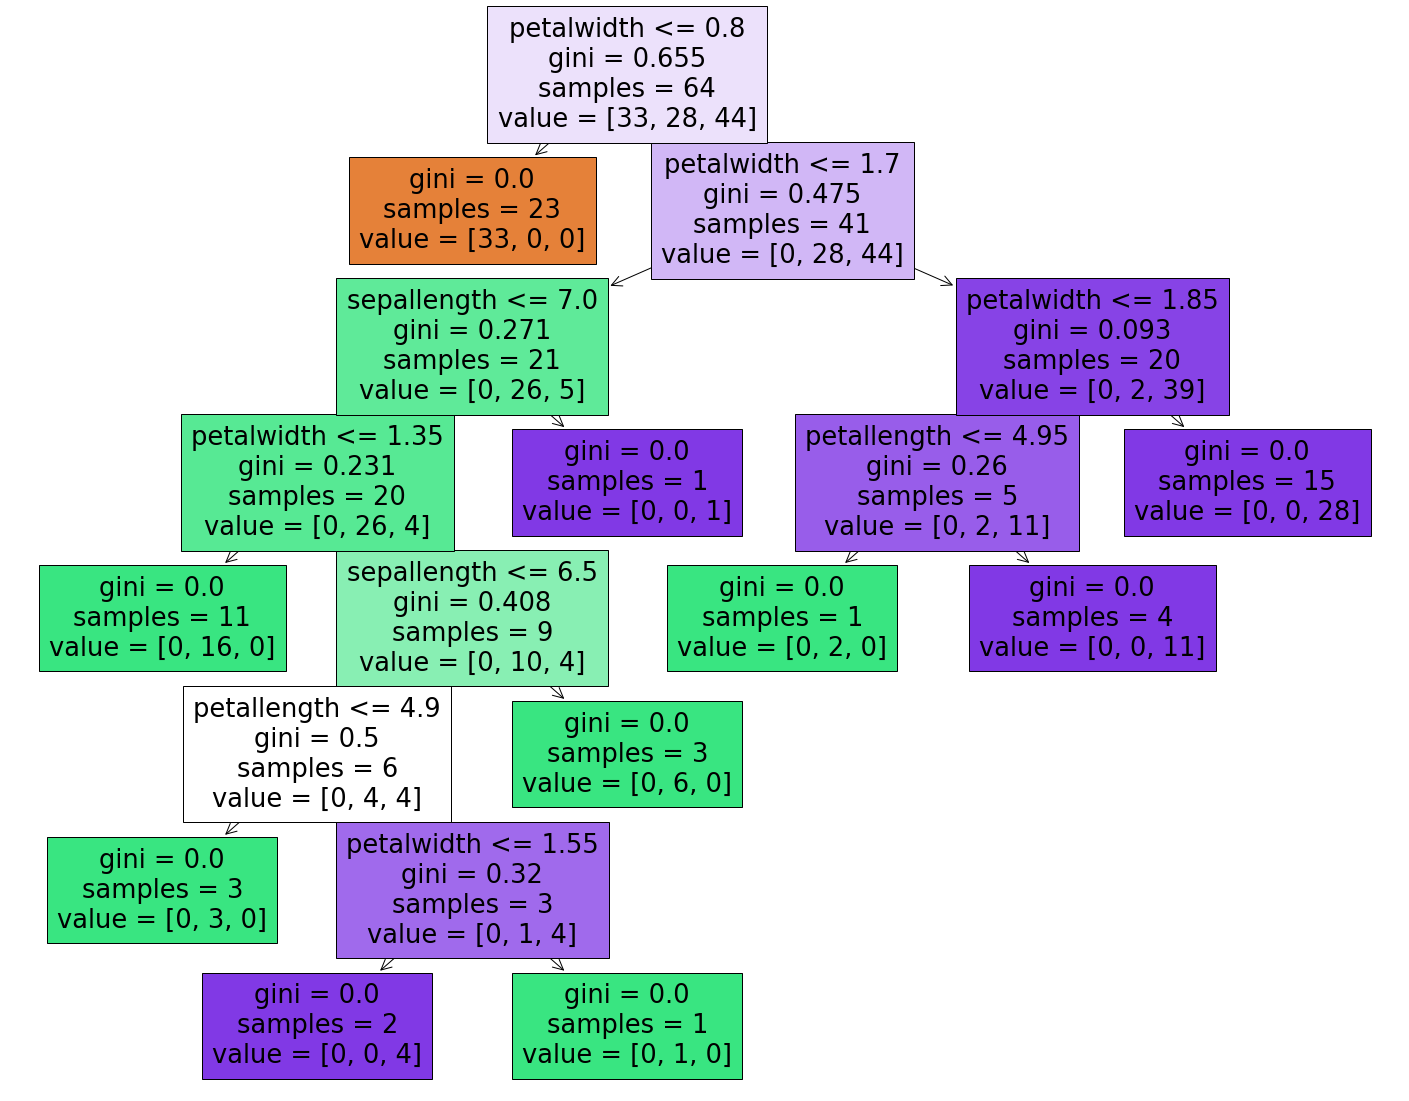

In [25]:
fig=plt.figure(figsize=(25,20))
a=tree.plot_tree(clf.estimators_[1],feature_names=x.columns,filled=True)